In [44]:
# This code just analyzes some of the hdf5 stuff and lets you poke around a bit
# Original is explain_this_file.py but decided notebooks are probably better
import h5py
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# TRY keep consistent path relations. Just put them in 4022S_data
# Relative path starts with "../4022S_data/undergrad_testset/" followed by filename
f = h5py.File('../4022S_data/undergrad_testset/Experiment_moving_target_forward_data.hdf5')

In [36]:
print(list(f.keys()))   #h5py.File works like a python dictionary
                        #we can check the keys

sensor_dataset = f['Sensors']

# calling "sensor_dataset.shape" in terminal bounces an error because it is a group 
# in the hierarchy, not an actual dataset

print(sensor_dataset.name) # is the name of whats in sensor_dataset

['Comments', 'Sensors']
/Sensors


In [37]:
print("This is everything in here\n_______________________________________________")
def printname(name):
    print(name)
#f.visit(printname) # This will print all of the hierarcies and files in the file

display_all = input("Do you want to skip the blurb [y/N]?\n")

if display_all == "n" or display_all == "N":
    f.visit(printname)

# until this point, everything is from https://docs.h5py.org/en/stable/quick.html#quick
# looking now at https://docs.h5py.org/en/stable/high/group.html#group

This is everything in here
_______________________________________________


In [81]:
target_frame = 'Sensors/TI_Radar/Data/Frame_100'

frame_data = f[f'{target_frame}/frame_data']
time_data = f[f'{target_frame}/Timestamps/nano_seconds']
# Sensors/TI_Radar/Data/Frame_99/Timestamps/nano_seconds
# Sensors/TI_Radar/Data/Frame_99/Timestamps/seconds

# samples x chirps x channels <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
print(frame_data.dtype)
samples = frame_data[:,0,0]
print(samples)

# Print the actual timestamp values
print(time_data[()])


complex64
[  57.-659.j -343.-605.j -418.-297.j -369.+133.j -465.+263.j  -80.+373.j
  243.+492.j  421.+585.j  577.+105.j  772. -97.j  612.-398.j  302.-655.j
   44.-606.j  -69.-462.j -476.-504.j -216. -44.j -300.+187.j -318.+373.j
  114.+318.j  396.+257.j  309.+164.j  574.-149.j  468.-264.j  204.-416.j
  219.-597.j  -88.-379.j -214.-335.j -313.-232.j -181. +31.j -227.+149.j
   58. +71.j  170.+156.j  177. +49.j  164.-158.j  368.-158.j  134.-311.j
  -10.-310.j   62.-373.j -135.-247.j -227.-129.j -108.-173.j -110. +17.j
 -111. -73.j   -5.-115.j -366.+906.j    0.+789.j  158.+277.j  445.+182.j
  202.-141.j -206.-509.j -264.-504.j -470.-255.j -863. +81.j -762.+148.j
 -597.+558.j -444.+757.j  -76.+696.j  272.+751.j  337.+499.j  464. -41.j
  595.-188.j  120.-233.j -184.-542.j -358.-298.j]
342684037


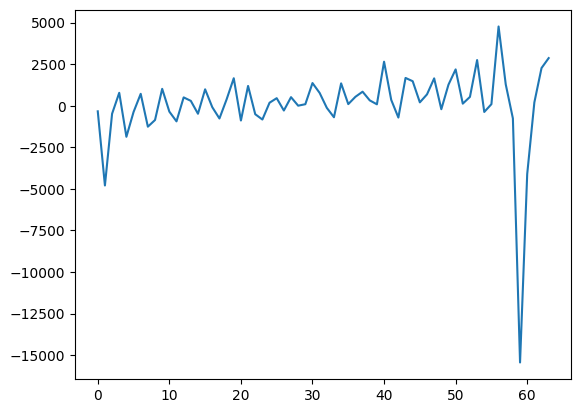

In [77]:
frequency_range = fft(samples)
plt.figure()
plt.plot(frequency_range)

In [40]:
f.close()